# Day 3: Assigning tasks

### Problem:

Hey, ORville here 👋

I'm a logistics manager overseeing the allocation of tasks to employees in our company, FurnitORe.

Right now we have 100 tasks that need to be completed, and we also have 100 employees available to handle them.

The catch is that assigning a task to an employee has a cost 💸.

These costs vary depending on the difficulty of the task, the expertise of the employee, and other factors.

I need your help to figure out the most cost-effective way to assign these tasks to employees.

You can assume that each task is done by just one employee, and one employee is assigned to just one task.

Can you help me solve this problem?

In instance.txt we can find an instance of the problem.

### Solution:

The aim of this problem is to minimize the cost of assigning employees to each task, in a way that every task is completed by one employee and one employee is assigned to just one task. 

So the mathematical formulation for this problem is the following,

$$
\begin{align*}
\text{minimize} & \sum_{i=1}^{100}\sum_{j=1}^{100} C_{ij}x_{ij}\\
\text{subject to} & \sum_{i=1}^{100} x_{ij} = 1 \quad \forall j=1,\dots,100\\
& \sum_{j=1}^{100} x_{ij} = 1 \quad \forall i=1,\dots,100\\
& x_{ij} \in\lbrace 0,1\rbrace \quad \forall i,j =1,\dots,100
\end{align*}
$$

where the decision variables $x_{ij}$ refers to assign the task $i$ to the employee $j$, and $C$ correspond to the cost matrix, where the entrances are the costs correspond to assign task $i$ to employee $j$.

Therefore, once the problem is formulated, the next step is to solve it using Pyomo for the cost matrix $C$ available in `instance.txt`.

In [1]:
import numpy as np

file_path = "instance.txt"

cost_matrix = []
with open(file_path, 'r') as file:
    lines = file.readlines()

# Extract the number of tasks (and employees)
num_tasks = int(lines[9].strip())
num_emp = int(lines[9].strip())

for i in range(num_tasks):
    # Each task row spans 8 lines
    start_idx = 10+i*8          # Start index for the current task row
    end_idx = start_idx+8     # End index (non-inclusive)
    
    # Combine the 8 lines and split into integers
    row = list(map(int, " ".join(lines[start_idx:end_idx]).split()))
    cost_matrix.append(row)
cost_matrix = np.asarray(cost_matrix)

# Check the shape 
print(cost_matrix.shape)
# Check the first 2 rows
print(cost_matrix[0:2,:])

(100, 100)
[[ 52  89  40  77  89  14   9  77  92  77  52  53  96  96  92  76  33  81
   92  84  36  81  47  55  87  35  31  71   6  20   8  10  75  54  50  12
   38   5  20  93  70  63  95  96  61  53  35  25  60  64  42  46  68  20
   61  53  61  28  86  16  51  32  39  19  28  82  31  99   2  30   7  23
   53  12  55  60  75   6   8   9  42  45  80  42  77  42  45  13  57  62
   66  73  21  94  36  10 100  29  46  69]
 [ 20  17  80  96  14  43   4  69   5  29  59  18  61  22  82  35  36   8
    7  22  15  83  27  33  27   7   7  64  83  32  70  53  92  79  33  46
   60  34  43  58   6   9  54  66  66  95  62  95  91  63  74  34  88  40
   22  59  43  86  34  31  58  37  35  95  53  63  39  56  27  30  21  48
   99  53   5  34  45  32  64  82   9  53  31  38  82  15  51  28  17  28
   15  49  89  34   9  57  31  76  88  92]]


In [2]:
from pyomo.environ import *

# Initialize the model
model = ConcreteModel()

# Sets
model.tasks = RangeSet(num_tasks)
model.emp = RangeSet(num_emp)

# Variables
model.x = Var(model.tasks, model.emp, domain=Binary)

# Constraint
# Each task must be assigned to exactly one employee
def alltask_rule(model, i):
    return sum(model.x[i, j] for j in model.emp) == 1
model.alltask = Constraint(model.tasks, rule=alltask_rule)

def allempl_rule(model, j):
    return sum(model.x[i, j] for i in model.tasks) == 1
model.allempl = Constraint(model.emp, rule=allempl_rule)


# Objective
# Minimize the total cost of assignment
model.obj = Objective(expr=sum(model.x[i, j] * cost_matrix[i-1][j-1] for i in model.tasks for j in model.emp), sense=minimize)


# Solve the model
solver = SolverFactory('glpk')
result = solver.solve(model)

# Extract and print the results
if result.solver.termination_condition == TerminationCondition.optimal:
    print("Optimal Assignment Found!")
    assign = [(i, j) for i in model.tasks for j in model.emp if model.x[i, j]() == 1]
    print(f"Assignment: {assign}")
else:
    print("No feasible assignment found.")


Optimal Assignment Found!
Assignment: [(1, 78), (2, 7), (3, 30), (4, 40), (5, 76), (6, 18), (7, 85), (8, 32), (9, 10), (10, 28), (11, 19), (12, 73), (13, 14), (14, 1), (15, 71), (16, 67), (17, 24), (18, 58), (19, 81), (20, 95), (21, 96), (22, 99), (23, 4), (24, 94), (25, 56), (26, 82), (27, 70), (28, 84), (29, 75), (30, 22), (31, 46), (32, 15), (33, 91), (34, 5), (35, 98), (36, 2), (37, 87), (38, 8), (39, 86), (40, 60), (41, 29), (42, 66), (43, 33), (44, 89), (45, 38), (46, 83), (47, 26), (48, 49), (49, 3), (50, 37), (51, 17), (52, 54), (53, 9), (54, 79), (55, 64), (56, 74), (57, 47), (58, 59), (59, 80), (60, 65), (61, 97), (62, 48), (63, 23), (64, 42), (65, 44), (66, 12), (67, 93), (68, 39), (69, 41), (70, 51), (71, 35), (72, 92), (73, 31), (74, 90), (75, 43), (76, 88), (77, 77), (78, 16), (79, 25), (80, 50), (81, 61), (82, 72), (83, 20), (84, 55), (85, 57), (86, 63), (87, 62), (88, 27), (89, 11), (90, 36), (91, 52), (92, 53), (93, 69), (94, 34), (95, 45), (96, 21), (97, 13), (98, 6),

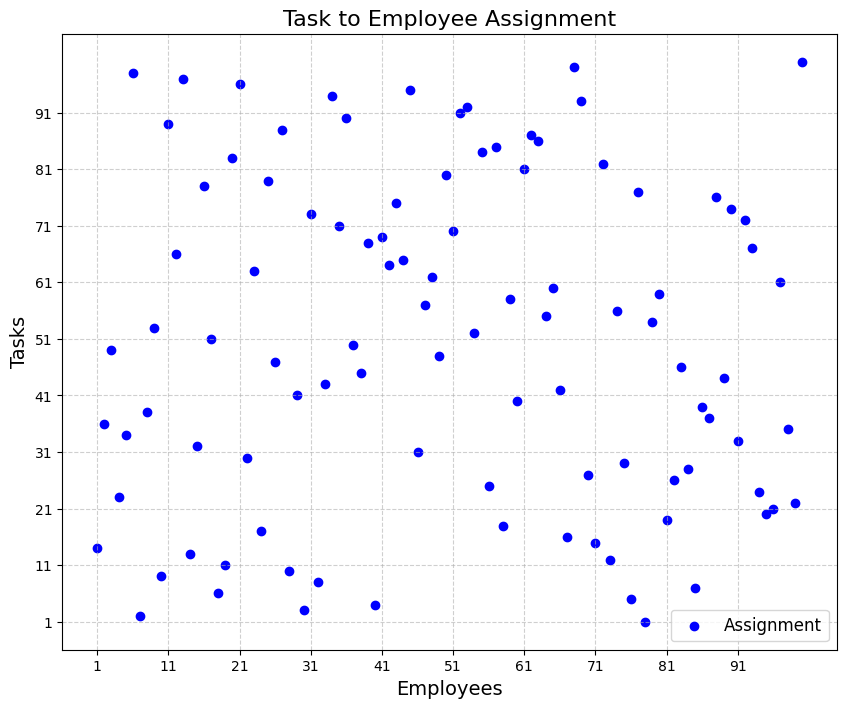

In [3]:
import matplotlib.pyplot as plt

# Prepare data for plotting
tasks, employees = zip(*assign)

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(employees, tasks, c='blue', marker='o', label='Assignment')
plt.title("Task to Employee Assignment", fontsize=16)
plt.xlabel("Employees", fontsize=14)
plt.ylabel("Tasks", fontsize=14)
plt.xticks(range(1, num_emp + 1, 10))
plt.yticks(range(1, num_tasks + 1, 10))
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.show()

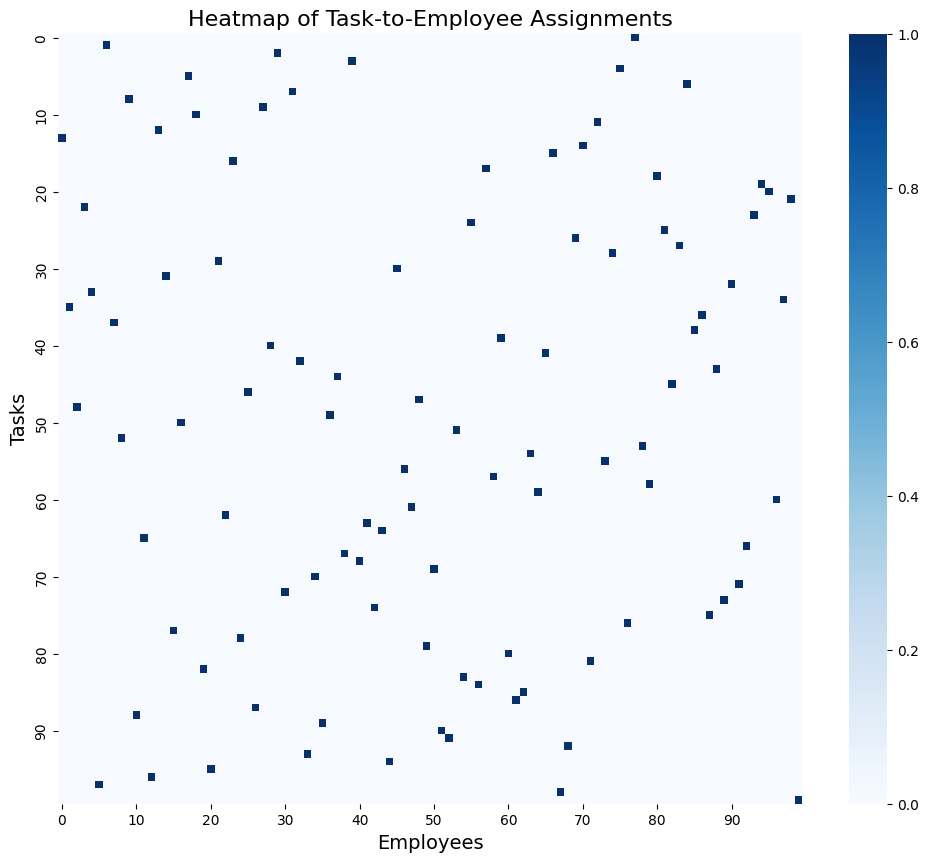

In [4]:
import seaborn as sns

# Generate a binary assignment matrix from the assignment list
assignment_matrix = np.zeros((num_tasks, num_emp), dtype=int)

for task, emp in assign:
    assignment_matrix[task - 1, emp - 1] = 1  # Adjusting for 0-based indexing in the matrix

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(assignment_matrix, cmap="Blues", cbar=True, xticklabels=10, yticklabels=10)
plt.title("Heatmap of Task-to-Employee Assignments", fontsize=16)
plt.xlabel("Employees", fontsize=14)
plt.ylabel("Tasks", fontsize=14)
plt.show()

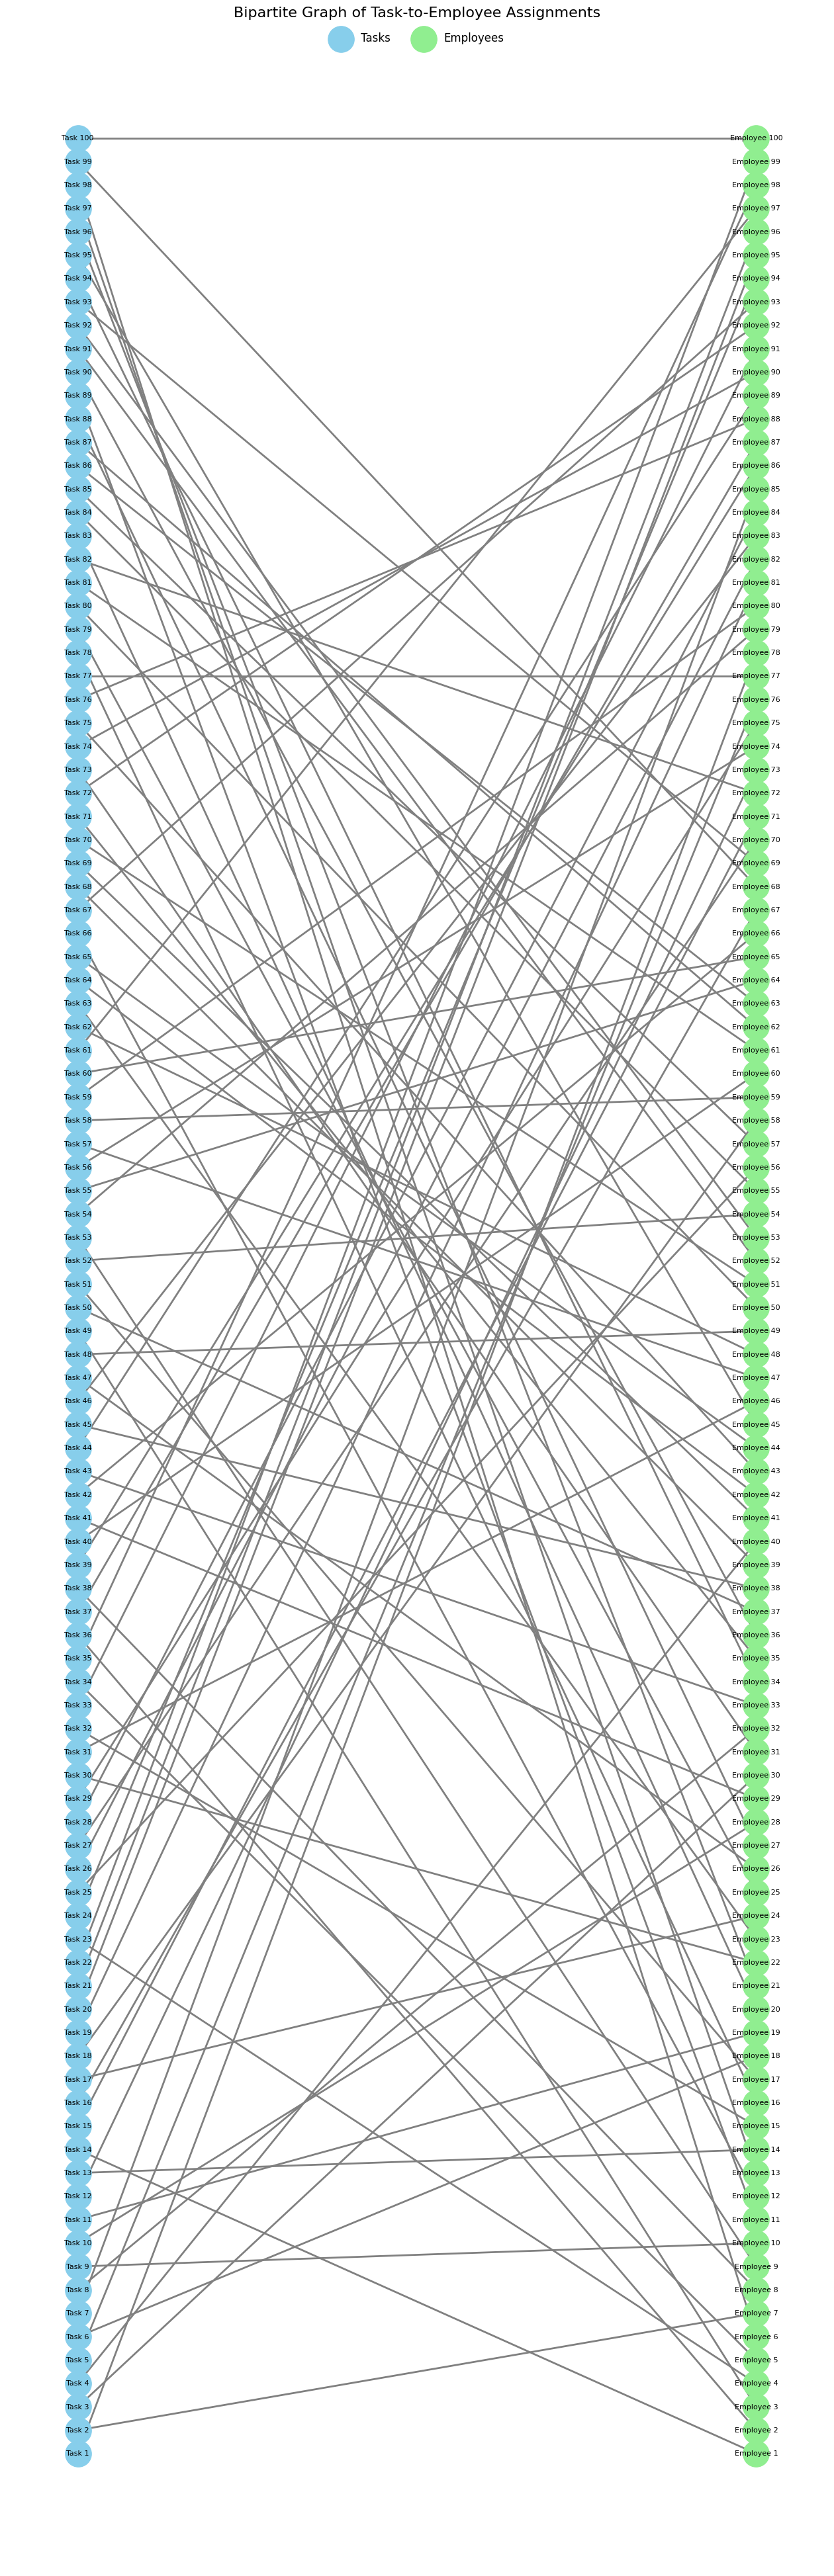

In [30]:
import networkx as nx

# Create a bipartite graph
B = nx.Graph()

# Add nodes for tasks and employees
tasks_nodes = [f"Task {i}" for i in range(1, num_tasks + 1)]
employees_nodes = [f"Employee {j}" for j in range(1, num_emp + 1)]

B.add_nodes_from(tasks_nodes, bipartite=0)  # Tasks are on one side
B.add_nodes_from(employees_nodes, bipartite=1)  # Employees are on the other side

# Add edges for assignments
edges = [(f"Task {task}", f"Employee {emp}") for task, emp in assign]
B.add_edges_from(edges)

# Improve the bipartite graph visualization
plt.figure(figsize=(16, 50))

# Generate a better layout: circular positions for each group
pos = {}
pos.update((node, (0, i)) for i, node in enumerate(tasks_nodes))  # Left side for tasks
pos.update((node, (1, i)) for i, node in enumerate(employees_nodes))  # Right side for employees

# Draw nodes and edges with enhanced styles
nx.draw_networkx_nodes(B, pos, nodelist=tasks_nodes, node_color="skyblue", node_size=800, label="Tasks")
nx.draw_networkx_nodes(B, pos, nodelist=employees_nodes, node_color="lightgreen", node_size=800, label="Employees")
nx.draw_networkx_edges(B, pos, edge_color="gray", alpha=1, width=2)

# Add labels
nx.draw_networkx_labels(B, pos, font_size=8)

plt.margins(y=0)
plt.title("Bipartite Graph of Task-to-Employee Assignments", fontsize=16)
plt.axis("off")
plt.legend(["Tasks", "Employees"], loc="upper center", fontsize=12, frameon=False, ncol = 2)
plt.show()
